/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

FileNotFoundError: [Errno 2] No such file or directory: 'plot/cleaned_data_plot.png'

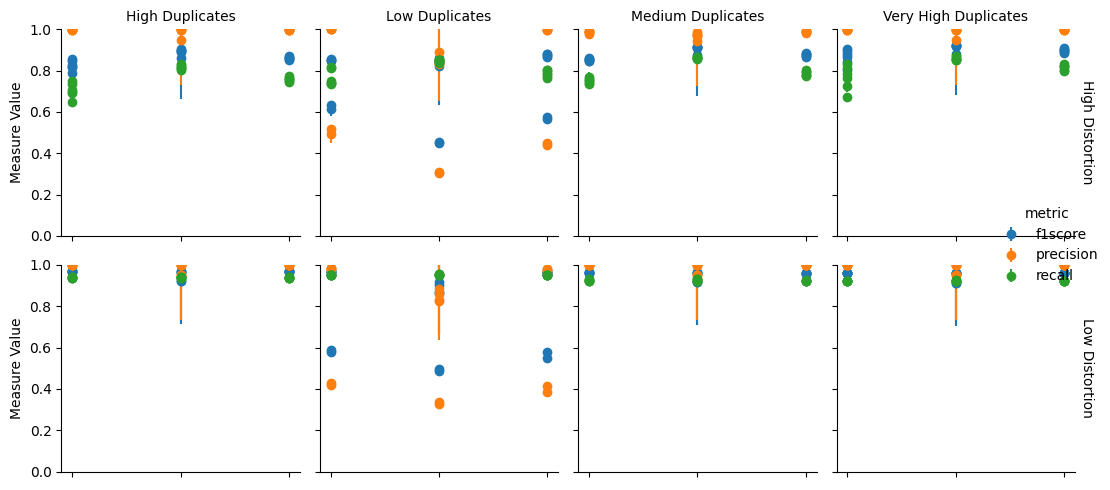

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
clean_data_path = 'clean_data.csv'
clean_data = pd.read_csv(clean_data_path)

# Clean the data by dropping the 'Unnamed: 0' column
clean_data.drop(columns=['Unnamed: 0'], inplace=True)

# Melt the dataframe to structure it for plotting
melted_clean_data = pd.melt(clean_data, 
                            id_vars=['model', 'prior', 'duplicates_level', 'distortion_level', 'num_iter'], 
                            value_vars=['precision_mean', 'recall_mean', 'f1score_mean',
                                        'precision_std', 'recall_std', 'f1score_std'],
                            var_name='metric', value_name='value')

# Separate the 'mean' and 'std' into different columns
melted_clean_data['metric_type'] = melted_clean_data['metric'].apply(lambda x: x.split('_')[1])
melted_clean_data['metric'] = melted_clean_data['metric'].apply(lambda x: x.split('_')[0])

# Pivot the table to have separate columns for mean and std values
clean_data_pivot = melted_clean_data.pivot_table(index=['model', 'prior', 'duplicates_level', 'distortion_level', 'num_iter', 'metric'], 
                                                 columns='metric_type', values='value').reset_index()

# Set up the plotting grid
g = sns.FacetGrid(clean_data_pivot, 
                  col="duplicates_level", 
                  row="distortion_level", 
                  hue="metric",
                  margin_titles=True, 
                  height=2.5)

# Add the point plots with error bars
g = g.map(plt.errorbar, 
          "model", "mean", "std", 
          fmt='o', linestyle='')

# Adjust plot details
g.add_legend()
g.set_axis_labels("", "Measure Value")
g.set_titles(col_template="{col_name} Duplicates", row_template="{row_name} Distortion")

# Set labels and limits
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Measure Value')
    ax.set_xticklabels(labels, rotation=45)
    ax.set_ylim(0, 1) # Metrics cannot exceed 1

plt.tight_layout()

# Save the plot to a file
cleaned_plot_path = 'plots/cleaned_data_plot.png'
plt.savefig(cleaned_plot_path)
